2024-04-05 23:51:09.201 | INFO     | FinMind.data.finmind_api:get_data:123 - download TaiwanStockInfo, data_id: 

1 Failed download:
['00679B.TW']: Exception('%ticker%: No timezone found, symbol may be delisted')

1 Failed download:
['00697B.TW']: Exception('%ticker%: No timezone found, symbol may be delisted')

1 Failed download:
['00719B.TW']: Exception('%ticker%: No timezone found, symbol may be delisted')

1 Failed download:
['00720B.TW']: Exception('%ticker%: No timezone found, symbol may be delisted')

1 Failed download:
['00721B.TW']: Exception('%ticker%: No timezone found, symbol may be delisted')

1 Failed download:
['00751B.TW']: Exception('%ticker%: No timezone found, symbol may be delisted')

1 Failed download:
['00786B.TW']: Exception('%ticker%: No timezone found, symbol may be delisted')

1 Failed download:
['00787B.TW']: Exception('%ticker%: No timezone found, symbol may be delisted')

1 Failed download:
['00788B.TW']: Exception('%ticker%: No timezone found, symbol may b

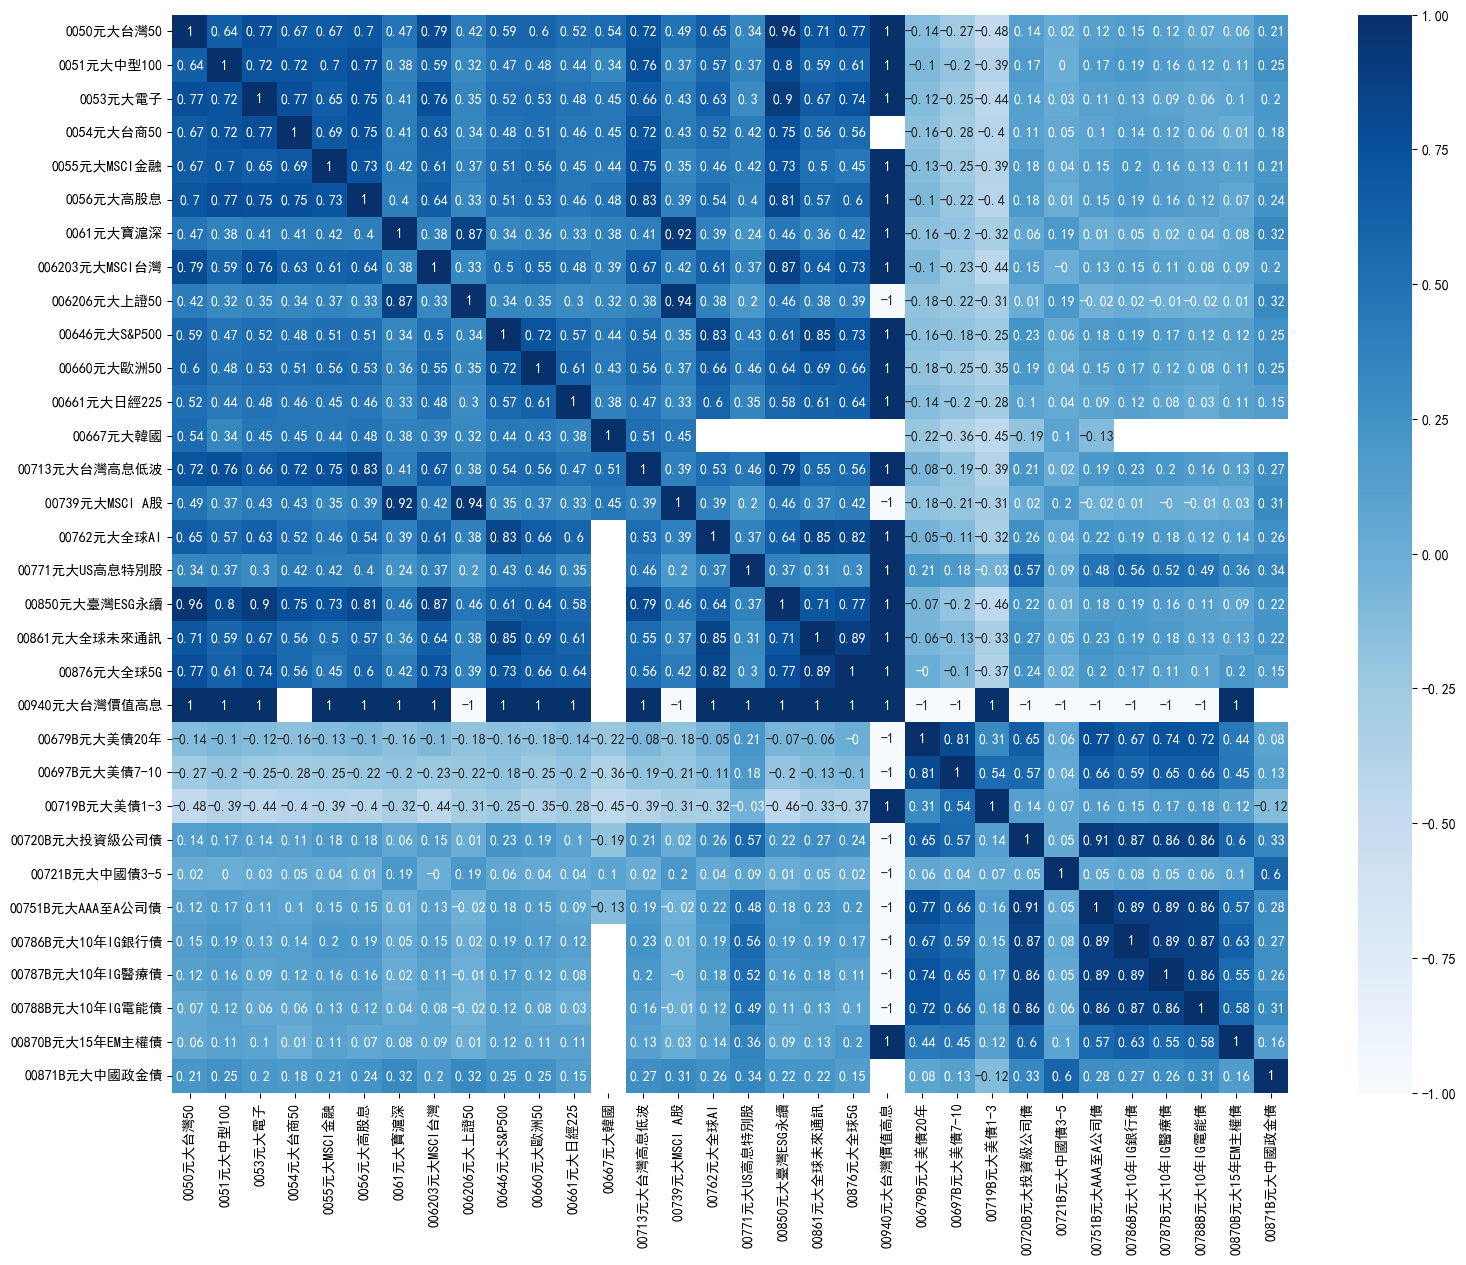

                0050    00719B
Date                          
2018-01-22  1.009179  0.999966
2018-01-23  1.003980  0.999990
2018-01-24  0.987542  0.999990
2018-01-25  1.002867  0.999990
2018-01-26  1.000572  0.999990
...              ...       ...
2024-03-28  0.995243  0.998098
2024-03-29  1.005736  1.001906
2024-04-01  0.997465  0.999049
2024-04-02  1.014295  1.001904
2024-04-03  0.993110  0.999683

[1504 rows x 2 columns]
商品:0050 權重:0.5
商品:00719B 權重:0.5
投資組合年化報酬:0.08686507964288259
投資組合風險:2.802668990600931e-05


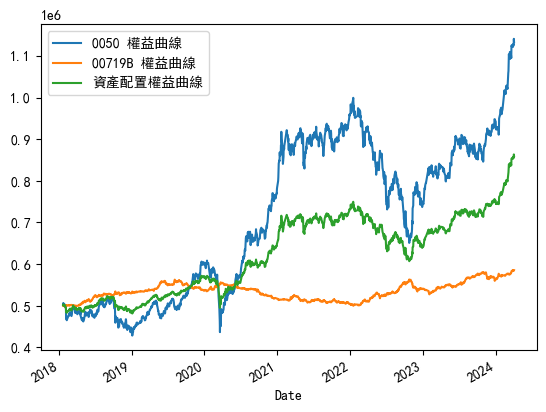

In [1]:
"""
台灣股債資產配置(基礎)
1. 找出股債相關性
2. 分配資產配置比例 
3. 取得相關資產資料
4. 資產配置風險報酬計算 
5. 資產配置權益曲線圖
6. 尋找最好的股債比
"""

# 載入函數工具檔
from Data import getDataFM, getMultipleReturn
from FinancialMetrics import PortfolioRiskReturnRatio
import seaborn as sns
from FinMind.data import DataLoader
import matplotlib.pyplot as plt

plt.rcParams["font.sans-serif"] = ["SimHei"]
plt.rcParams["axes.unicode_minus"] = False
api = DataLoader()

# 取出台灣股市 債市 ETF
df = api.taiwan_stock_info()
bond_dataframe = df[
    (df["stock_id"].str[-1] == "B")
    & (df["stock_name"].str.contains("債"))
    & (df["stock_name"].str.contains("元大"))
]
ETF_dataframe = df[
    (df["industry_category"].str[:3] == "ETF")
    & (df["stock_name"].str.contains("元大"))
    & (df["stock_id"].str[-1].str.isnumeric())
]

ETF_list = ETF_dataframe["stock_id"].to_list()
bond_list = bond_dataframe["stock_id"].to_list()

# 抓到所有歷史報酬率
ret_dataframe = getMultipleReturn(getDataFM, ETF_list + bond_list, "adj close")
# 將商品代碼換成商品名稱
ETF_name_list = (
    ETF_dataframe["stock_id"] + ETF_dataframe["stock_name"]
).to_list()
bond_name_list = (
    bond_dataframe["stock_id"] + bond_dataframe["stock_name"]
).to_list()
ret_dataframe.columns = ETF_name_list + bond_name_list

# 計算相關性
corr = round(ret_dataframe.corr(), 2)

# 並繪製熱力圖
plt.figure(figsize=(18, 14))
sns.heatmap(corr, cmap="Blues", annot=True)
plt.show()

# 股債資產配置比例
asset_allocation = {"0050": 0.50, "00719B": 0.50}

# 計算投資組合風險報酬
PortfolioRiskReturnRatio(getDataFM, asset_allocation, "adj close", 500000)
